# Pymaceuticals Inc. Liberty Heise
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem


# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(study_results,mouse_metadata,how = 'left',on = 'Mouse ID')

# Display the data table for preview
data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
number_of_mice = len(data_df["Mouse ID"].unique())

number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#data_df.duplicated (subset = ["Mouse ID","Timepoint"])
dropped_m = data_df.loc[data_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dropped_m

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
data_df.duplicated

<bound method DataFrame.duplicated of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex 

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#data_df.drop_duplicates(subset = ["Mouse ID","Timepoint"], keep = "first", inplace = False)
#clean_df = data_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
#clean_df
clean_df = data_df[data_df['Mouse ID'].isin(dropped_m)==False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())


248

## Summary Statistics

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_df = data_df.groupby("Drug Regimen")
summary_df.head()

# Calculate the mean, median, standard deviation, and sem for each drug
tumor_mean = summary_df["Tumor Volume (mm3)"].mean()
tumor_median = summary_df["Tumor Volume (mm3)"].median()
tumor_stdev = summary_df["Tumor Volume (mm3)"].std()
tumor_sem = summary_df["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

summary_grouped_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_median,"Tumor Volume Std Dev": tumor_stdev, "Tumor Volume Std Err": tumor_sem})
summary_grouped_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

#summary_table_2 = summary_grouped_df.agg(['Mean Tumor Volume','Median Tumor Volume','Tumor Volume Std Dev','Tumor Volume Std Err'])["Tumor Volume (mm3)"]

summary_table_2 = summary_df.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

([<matplotlib.axis.XTick at 0x7fb1f3680e50>,
  ...],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ketapril'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Ketapril'),
  Text(5, 0, 'Ketapril'),
  Text(6, 0, 'Ketapril'),
  Text(7, 0, 'Ketapril'),
  Text(8, 0, 'Ketapril'),
  Text(9, 0, 'Naftisol'),
  Text(10, 0, 'Naftisol'),
  Text(11, 0, 'Naftisol'),
  Text(12, 0, 'Ketapril'),
  Text(13, 0, 'Naftisol'),
  Text(14, 0, 'Naftisol'),
  Text(15, 0, 'Naftisol'),
  Text(16, 0, 'Naftisol'),
  Text(17, 0, 'Naftisol'),
  Text(18, 0, 'Naftisol'),
  Text(19, 0, 'Naftisol'),
  Text(20, 0, 'Naftisol'),
  Text(21, 0, 'Naftisol'),
  Text(22, 0, 'Naftisol'),
  Text(23, 0, 'Naftisol'),
  Text(24, 0, 'Naftisol'),
  Text(25, 0, 'Naftisol'),
  Text(26, 0, 'Naftisol'),
  Text(27, 0, 'Ketapril'),
  Text(28, 0, 'Ketapril'),
  Text(29, 0, 'Infubinol'),
  Text(30, 0, 'Infubinol'),
  Text(31, 0, 'Infubinol'),
  Text(32, 0, 'Infubinol'),
  Text(33, 0, 'Infubinol'),
  Text(34, 0, 'Infubinol'),
  Tex

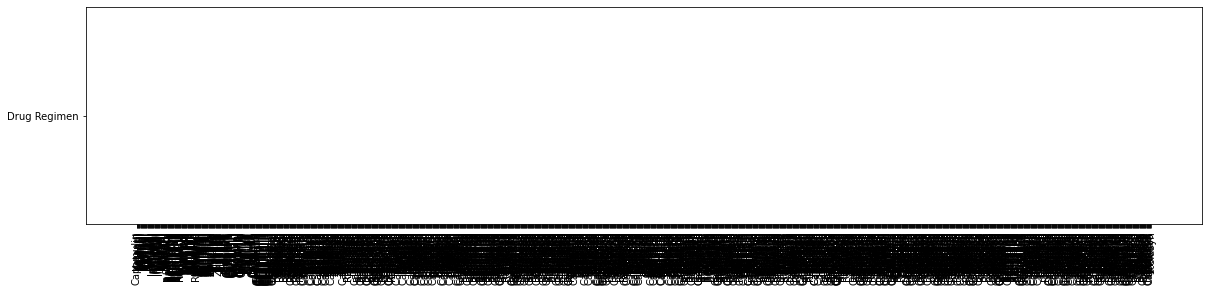

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Set x axis and tick locations
x_axis = np.arange(len(clean_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,4))
plt.bar(x_axis, "Drug Regimen", color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, clean_df["Drug Regimen"], rotation="vertical")


In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
matplotlib.pyplot.bar("Drug Regimen", "Number of Mice", width = 0.8, bottom = None, align = "center", data = None)


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

